In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import re


def load_json_to_dataframe(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return pd.DataFrame(data['data'])

def jitter_labels(y, sigma=0.05):
    """Adding random noise to the data"""
    return np.clip(np.random.normal(y, sigma), 0, 1)

# Data from Homepage
data is from API

In [2]:
link_homepage = '../data/homepage_posts_data.json'
df_homepage = load_json_to_dataframe(link_homepage)

In [3]:
df_homepage.columns

Index(['id', 'created_at', 'title', 'slug', 'description', 'source', 'author',
       'published_at', 'votes', 'voted', 'comments', 'tags', 'hot', 'adult',
       'media', 'editable', 'deletable', 'resource', 'actions', 'archive',
       'observed_discussion', 'parent', 'tag_pinned_content', 'pinnable',
       'recommended', 'family_friendly', 'favourite', 'alerts', 'ama'],
      dtype='object')

In [4]:
df_homepage = df_homepage.drop(columns=[
    'created_at', 'source', 'slug', 'published_at', 'hot', 'adult', 'media', 'observed_discussion', 'parent', 'tag_pinned_content', 'pinnable', 'editable', 'deletable', 'resource', 'actions', 'archive', 'recommended', 'family_friendly', 'favourite', 'ama', 'voted'
])

In [5]:
df_homepage['author'] = df_homepage['author'].apply(lambda x: x['username'])
df_homepage['downvotes'] = df_homepage['votes'].apply(lambda x: x['down'])
df_homepage['votes'] = df_homepage['votes'].apply(lambda x: x['up'])

In [6]:
df_homepage

,id,title,description,author,votes,comments,tags,alerts,downvotes
0,7766021,Pracujących Polaków nie stać nawet na metr mie...,Polaków nie stać na zakup nawet 1 m kw. mieszk...,ross-flow,485,"{'hot': False, 'count': 222}","[nieruchomosci, wynajem, rynekwtorny, mieszkania]",[],13
1,7798801,"Owczarki zaatakowały jamnika. Brutus nie żyje,...",To był spacer jak każdego innego dnia. Nagle ł...,coiber,631,"{'hot': False, 'count': 101}","[lodz, psy, pies, psiarze, bekazpodludzi]",[],30
2,7667729,Mocne oświadczenie PZN po aferze w skokach. Li...,Tymczasowe zawieszenie sztabu szkoleniowego i ...,Bobito,288,"{'hot': False, 'count': 56}","[sport, skoki, skokinarciarskie, swiat]",[],4
3,7798789,Jak ojciec Sebastiana M. stracił milion złotyc...,"Właścicielem pojazdu był Jarosław M., ojciec S...",Kolekcjoner_dusz,707,"{'hot': False, 'count': 207}","[sebastianmajtczak, majtczak, polskiedrogi, wy...",[],4
4,7766029,zus anulował rente,"mieszkanka Szczecina, miała 27 lat, gdy straci...",stefan_1971,458,"{'hot': False, 'count': 123}","[zus, renta]",[],10
...,...,...,...,...,...,...,...,...,...
9858,7733231,xcancel.com - przeglądaj twitty I odpowiedzi b...,"W sumie trochę mnie dziwi, ze ta stronka nie j...",Returned,438,"{'hot': False, 'count': 32}","[technologia, twitter, lifehack, internet]",[],5
9859,7700465,Tani sposób Niemców na oczyszczanie wody. W Po...,"Nowe badanie pokazuje, że mikroplastiki i toks...",Rasteris,427,"{'hot': False, 'count': 53}","[woda, przyroda, nauka, technika, las]",[],9
9860,7798775,"Zabił rodzinę, uciekł ze szpitala. Dożywocia n...","Prokuratura żądała dożywocia, sąd się na to ni...",ZobaczLink,235,"{'hot': False, 'count': 28}","[polska, prawo, sadowehistorie, kryminalne, mo...",[],1
9861,7733241,Zabrali i umieścili w rodzinie zastępczej. Czt...,Policja odebrała i umieściła w rodzinie zastęp...,Kolekcjoner_dusz,543,"{'hot': False, 'count': 185}","[warszawa, policja, afera]",[],58


# Data from id scan

In [7]:
link = '../data/final_combined_results_7631933-7651933.json'
df_id = load_json_to_dataframe(link)

In [8]:
df_id.columns

Index(['id', 'url', 'title', 'points', 'description', 'added_date', 'tags',
       'alerts', 'comments', 'status', 'proxy', 'error'],
      dtype='object')

In [9]:
df_id = df_id[df_id['error'].isna()]

In [10]:
df_id = df_id.drop(columns=['status', 'proxy', 'error']).reset_index(drop=True)

In [11]:
alerts_df_id = df_id[df_id['alerts'].notna()]
alerts_df_id['zakopane'] = alerts_df_id['alerts'].apply(lambda x: x['title'] == 'To Znalezisko zostało zakopane')
alerts_df_id['duplikat'] = alerts_df_id['alerts'].apply(lambda x: (x['title'] == 'To Znalezisko zostało wyrzucone') and ('Duplikat' in x['body']))
print("Count of alerts: ", len(alerts_df_id))

# Check if all alerts are either 'zakopane' or 'duplikat'
zakopane_duplikat = (alerts_df_id['zakopane'] | alerts_df_id['duplikat']).all()

if zakopane_duplikat:
    print("All alerts are either 'zakopane' or 'duplikat'")
    
    # Remove the 'alerts' column as it is no longer needed
    alerts_df_id = alerts_df_id.drop(columns=['alerts'])

    # can remove duplicates now
    alerts_df_id = alerts_df_id[~alerts_df_id['duplikat']].drop(columns=['duplikat'])

Count of alerts:  1153
All alerts are either 'zakopane' or 'duplikat'


/tmp/ipykernel_87669/3722623095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alerts_df_id['zakopane'] = alerts_df_id['alerts'].apply(lambda x: x['title'] == 'To Znalezisko zostało zakopane')
/tmp/ipykernel_87669/3722623095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alerts_df_id['duplikat'] = alerts_df_id['alerts'].apply(lambda x: (x['title'] == 'To Znalezisko zostało wyrzucone') and ('Duplikat' in x['body']))


## Get comments and see if they contain information about manipulation and check their points

**NOTE**: this is still important to check because word 'manipulation' can also not address the original post

In [12]:
# content: None means that there was some multimedia posted and no text
df_id['comments_content_points'] = df_id['comments'].apply(lambda x: [(c['content'], c['points']) for c in x if c['content'] is not None])

In [13]:
import re
pattern = re.compile(r'\bmanipula\w*\b', flags=re.IGNORECASE)

df_id['mentions_manipulation'] = df_id['comments_content_points'] \
    .apply(lambda list_c:
        any(pattern.search(c[0]) for c in list_c if isinstance(c[0], str))
    )

In [14]:
df_id['top_manipulation_comment'] = df_id['comments_content_points'].apply(
    lambda comments: max(
        (c for c in comments if pattern.search(c[0])),
        key=lambda c: c[1],
        default=None
    )
)

## Is comment containing 'informacja nieprawdziwa' or 'nieprawdziwa informacja'

In [15]:
df_id['comment_informacja_nieprawdziwa'] = df_id['comments_content_points'].apply(
    lambda comments: max(
        (c for c in comments if re.compile(r'informacja nieprawdziwa|nieprawdziwa informacja', re.IGNORECASE).search(c[0])),
        key=lambda c: c[1],
        default=None
    )
)

In [16]:
df_id['comment_informacja_nieprawdziwa'].notna().sum()

np.int64(53)

In [17]:
comment_informacja_nieprawdziwa_points = df_id[df_id['comment_informacja_nieprawdziwa'].notna()]['comment_informacja_nieprawdziwa'].apply(lambda x: x[1])\
      / df_id[df_id['comment_informacja_nieprawdziwa'].notna()]['points'].abs()

df_id.loc[comment_informacja_nieprawdziwa_points.index, 'score_informacja_nieprawdziwa'] = comment_informacja_nieprawdziwa_points

In [18]:
comment_informacja_nieprawdziwa_points

198    -0.086957
247     0.035714
865     0.350000
1525    0.140044
1833    0.000000
1842    0.033898
1961    0.409586
2595    0.020713
2601    2.000000
3319    0.160105
3504    0.000000
3549    0.069124
3583   -0.583333
4131    0.000000
4142    0.083333
4244    0.061475
4283    0.117419
4405    0.714286
4614    0.443182
4699    0.011050
4797   -0.020942
4904    0.028956
5189    1.750000
5332    0.032710
5381    0.000000
6087    0.357143
6292    0.000000
6298    0.048780
6335    0.055419
6387   -0.444444
6416    0.005391
6656    0.266714
6681    0.000000
6719   -0.003704
6815    0.000000
7049    0.333333
7144    0.293103
7301    0.197842
7482    0.062500
7588    1.000000
7871    0.000000
7875    0.218487
7897    0.031496
7950    0.347032
7957    0.026622
8023    0.134490
8129    3.000000
8368    0.313758
8549    0.128000
8945   -0.100000
8986    0.250000
9127    0.333333
9203    0.067385
dtype: float64

### Method involves label smoothing - model will not generalize well possibly

In [19]:
df_id.loc[alerts_df_id.index, 'score_zakopane'] = np.clip(
    np.random.normal(loc=0.7, scale=0.05, size=len(alerts_df_id.index)),
    0, 1
)

In [20]:
#df_id['scores'] = df_id[['score_informacja_nieprawdziwa', 'score_zakopane']].sum(axis=1, skipna=True).fillna(0)
df_id['score_informacja_nieprawdziwa'] = 0
df_id['scores'] = df_id[['score_informacja_nieprawdziwa', 'score_zakopane']].sum(axis=1, skipna=True).fillna(0)

In [21]:
df_id.loc[df_id[df_id['scores'] == 0].index, 'scores'] = np.clip(
    np.random.normal(loc=0, scale=0.05, size=len(df_id[df_id['scores'] == 0].index)),
    0, 1
)

In [22]:
df_id = df_id.rename(columns={'points': 'votes'})

# Data from Misinformation archive
https://wykoppl-informacjanieprawdziwa.surge.sh/

In [23]:
df_misinfo = load_json_to_dataframe('../data/mssinfo_wykop_posts.json')

In [24]:
df_misinfo['scores'] = np.clip(
    np.random.normal(loc=1, scale=0.05, size=len(df_misinfo.index)),
    0, 1
)

# Analysis

Data From ID scan: `df`  
Data from homepage: `df_homepage`  
Data from misinfo list: `df_misinfo`

In [25]:
df_homepage.columns

Index(['id', 'title', 'description', 'author', 'votes', 'comments', 'tags',
       'alerts', 'downvotes'],
      dtype='object')

For now, `df_homepage` is not yet to be joined because the comments are not fetched

In [26]:
df_id.columns

Index(['id', 'url', 'title', 'votes', 'description', 'added_date', 'tags',
       'alerts', 'comments', 'comments_content_points',
       'mentions_manipulation', 'top_manipulation_comment',
       'comment_informacja_nieprawdziwa', 'score_informacja_nieprawdziwa',
       'score_zakopane', 'scores'],
      dtype='object')

In [27]:
df_misinfo.columns

Index(['id', 'url', 'title', 'description', 'added_date', 'author', 'tags',
       'alerts', 'votes', 'downvotes', 'scores'],
      dtype='object')

In [28]:
df_id_ready = df_id.drop(columns=[
    'id', 'url', 'added_date', 'alerts', 'comments', 'comments_content_points', 
    'mentions_manipulation', 'top_manipulation_comment', 'comment_informacja_nieprawdziwa',
    'score_informacja_nieprawdziwa', 'score_zakopane'
    ]
)

In [29]:
df_id_ready.head()

,title,votes,description,tags,scores
0,Rządy PiS bez cenzury,2.0,Złoty interes,"[polityka, biznes, bekazpisu]",0.064174
1,Elon Musk robi Hitlera na wiecu prezydenckim,5.0,Nasi dziadkowie przewracają się w grobach.,"[elon, musk, wiec, hitler]",0.627917
2,K. Nawrocki przez pół roku mieszkał w apartame...,828.0,Karol Nawrocki jako dyrektor Muzeum II Wojny Ś...,"[polityka, wybory, sejm, pis]",0.101737
3,Elon Musk chce kupić Intela,12.0,"Nieoczekiwany zwrot u Intela. Okazuje się, że ...","[elonmusk, intel, technologia]",0.000000
4,Pierwsze decyzje Donalda Trumpa.,3.0,Pierwsze decyzje Donalda Trumpa.,"[ekonomia, usa, trump, wydarzeniaswiatedek, sw...",0.000000


In [30]:
df_misinfo_ready = df_misinfo.drop(columns=[
    'id', 'url', 'added_date', 'author', 'alerts', 'downvotes'
    ]
)

In [31]:
df_misinfo_ready.head()

,title,description,tags,votes,scores
0,We Francji spokojnie. W sylwestra spalono tylk...,"W noc sylwestrową we Francji spalono ""tylko"" 9...","[europa, swiat, imigranci, ciekawostki, francja]",2305,1.000000
1,[Afera Prezydencka] Moderator fDy,A gdyby tak większa ilość użytkowników #wykop ...,"[wykop, afera, aferaprezydecka, lechwalesacont...",428,0.998751
2,Szczera wypowiedź Tomasza Lisa,pan redaktor w końcu powiedział co tak naprawd...,"[polityka, heheszki, lisnadzis, kod, media]",1357,0.938996
3,Inwazja zombie-islamu na Europę stała się fakt...,Zobaczcie jak przybysze bawią się z Niemką w c...,"[europa, islam, imigranci, kolonia, uchodzcy, ...",145,0.871840
4,Czy tak wyglądały ataki w Koloni w Nowy Rok?,Podejrzewam że to dopiero początek wrzut tego ...,"[europa, imigranci, islam]",33,1.000000


In [32]:
df = pd.concat([df_misinfo_ready, df_id_ready], ignore_index=True)

In [33]:
df['scores'] = df['scores'].apply(lambda x: min(1, max(0, x)))

<Axes: ylabel='Frequency'>

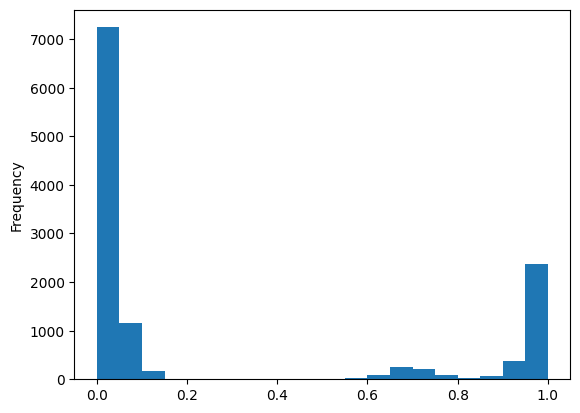

In [34]:
df['scores'].sort_values().plot(kind='hist', bins=20)

# Preparing the data

In [35]:
df["text"] = (
    df["title"].fillna('') + " " +
    df["description"].fillna('') + " " +
    df["tags"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
)

In [36]:
def clean_text(t):
    def _normalize_polish_characters(text):
        mapping = {
            "ą": "a", "ć": "c", "ę": "e", "ł": "l",
            "ń": "n", "ó": "o", "ś": "s", "ź": "z", "ż": "z",
            "Ą": "A", "Ć": "C", "Ę": "E", "Ł": "L",
            "Ń": "N", "Ó": "O", "Ś": "S", "Ź": "Z", "Ż": "Z"
        }
        for k, v in mapping.items():
            text = text.replace(k, v)
        return text
    t = t.lower()
    t = _normalize_polish_characters(t)
    t = re.sub(r"http\S+", "", t)
    t = re.sub(r"[^a-z0-9\s]", "", t)
    return t.strip()

df["clean_text"] = df["text"].apply(clean_text)

In [37]:
df['clean_text'].head()

0    we francji spokojnie w sylwestra spalono tylko...
1    afera prezydencka moderator fdy a gdyby tak wi...
2    szczera wypowiedz tomasza lisa pan redaktor w ...
3    inwazja zombieislamu na europe stala sie fakte...
4    czy tak wygladaly ataki w koloni  w nowy rok p...
Name: clean_text, dtype: object

## Initial model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["scores"], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    min_df=2
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = Ridge(alpha=1.0)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 0.22536426634617063
R²: 0.4958065579272678


In [39]:
for pr, ts, x_ts, _ in zip(y_pred, y_test, X_test, range(10)):
    print(pr, ts, x_ts)

0.6233216750189967 1.0 uk obniza vat z 20 do 5 na wszystkie produkty w sklepach  taka pomoc dla obywateli na 6mcy europa uk vat ekonomia polityka
0.07046544315806735 0.0 rok jedzenia chicken sandwich w popeyes za darmo kolejnym otwarciom nowych lokali popeyes w polsce towarzyszy promocja w ktorej na klientow czeka az rok darmowego jedze popeyes promocja darmo kurczak
0.47842213372739373 1.0 to tylko jakis patent   patent z 2015 roku teoriespiskowe patent covid19
0.06937445255787658 0.08559385623378474 microsoft account od lutego duza zmiana w logowaniu sie do konta od lutego jesli zalogujesz sie uzytkownicy beda automatycznie zalogowani caly czas istnieje nowa globalna opcja wylogowania wyloguj sie wszedzie moze to potrwac do 24 godzin zanim microsoft wyloguje uzytkownika ze wszystkich urzadzen chyba ich troche ponioslo microsoft windows cyberbezpieczenstwo security cybersecurity komputery
0.33763584046245426 0.012349442072239605 rzad w uk domaga sie dostepu do szyfrowanych danych uzyt

## Change problem to classification

In [40]:
df["scores"]

0        1.000000
1        0.998751
2        0.938996
3        0.871840
4        1.000000
           ...   
12062    0.054837
12063    0.045674
12064    0.046523
12065    0.025547
12066    0.000000
Name: scores, Length: 12067, dtype: float64

In [41]:
df["label"] = df["scores"].apply(lambda x: 0 if x < 0.35 else (2 if x > 0.85 else 1))

df["label"].value_counts(normalize=True)

label
0    0.710533
2    0.234441
1    0.055026
Name: proportion, dtype: float64

In [42]:
df = df[~df['clean_text'].duplicated()].reset_index(drop=True)

              precision    recall  f1-score   support

           0      0.887     0.862     0.874      1715
           1      0.237     0.338     0.279       133
           2      0.787     0.773     0.780       550

    accuracy                          0.813      2398
   macro avg      0.637     0.658     0.644      2398
weighted avg      0.828     0.813     0.820      2398



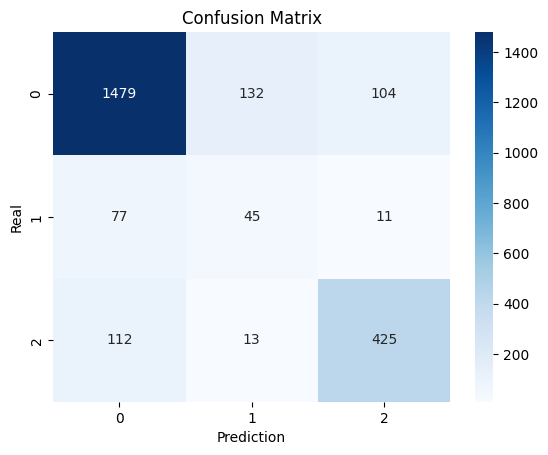

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)


model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000, ngram_range=(1,2), min_df=2)),
    ("clf", LogisticRegression(max_iter=1000, class_weight='balanced'))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title("Confusion Matrix")
plt.show()

### Class balancing

              precision    recall  f1-score   support

           0      0.956     0.941     0.948      1715
           1      0.512     0.650     0.573       100
           2      0.580     0.580     0.580       100

    accuracy                          0.907      1915
   macro avg      0.682     0.724     0.700      1915
weighted avg      0.913     0.907     0.909      1915



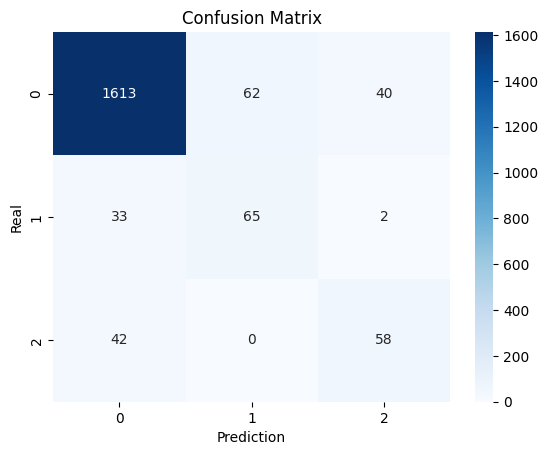

In [44]:
from sklearn.utils import resample

majority = df[df.label == 0]
minority1 = df[df.label == 1]
minority2 = df[df.label == 2]

minority1_upsampled = resample(minority1, replace=True, n_samples=500, random_state=42)
minority2_upsampled = resample(minority2, replace=True, n_samples=500, random_state=42)

df_balanced = pd.concat([majority, minority1_upsampled, minority2_upsampled])

# Retraining
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced["clean_text"], df_balanced["label"], test_size=0.2, random_state=42, stratify=df_balanced["label"]
)


model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000, ngram_range=(1,3), min_df=2, sublinear_tf=True)), # bigrams and trigrams
    ("clf", LogisticRegression(max_iter=1000, class_weight='balanced'))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title("Confusion Matrix")
plt.show()

### Try only 2 labels classification

In [45]:
df["label"] = df["scores"].apply(lambda x: 0 if x < 0.5 else 1)

df["label"].value_counts(normalize=True)

label
0    0.715096
1    0.284904
Name: proportion, dtype: float64

              precision    recall  f1-score   support

           0      0.896     0.907     0.901      1715
           1      0.758     0.735     0.746       683

    accuracy                          0.858      2398
   macro avg      0.827     0.821     0.824      2398
weighted avg      0.857     0.858     0.857      2398



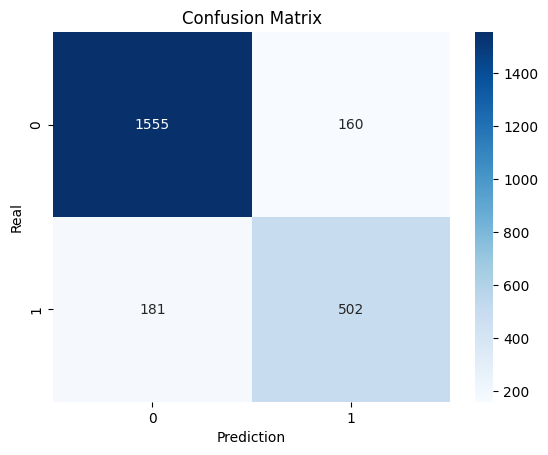

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)


model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000, ngram_range=(1,2), min_df=2)),
    ("clf", LogisticRegression(max_iter=1000, class_weight='balanced'))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title("Confusion Matrix")
plt.show()

### With balancing

              precision    recall  f1-score   support

           0      0.864     0.903     0.883      1715
           1      0.898     0.858     0.878      1715

    accuracy                          0.880      3430
   macro avg      0.881     0.880     0.880      3430
weighted avg      0.881     0.880     0.880      3430



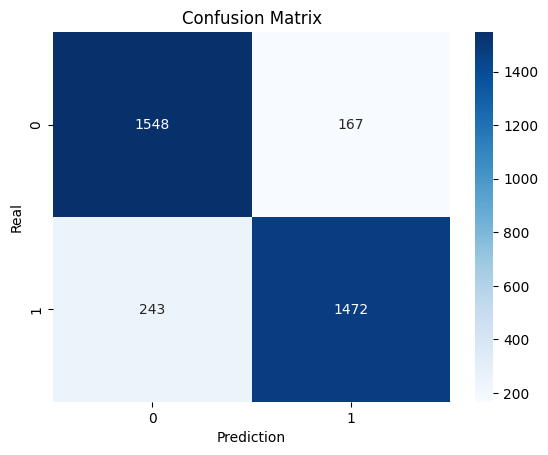

In [47]:
from sklearn.utils import resample

majority = df[df.label == 0]
minority = df[df.label == 1]

minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

df_balanced = pd.concat([majority, minority_upsampled])

# Retraining
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced["clean_text"], df_balanced["label"], test_size=0.2, random_state=42, stratify=df_balanced["label"]
)


model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000, ngram_range=(1,3), min_df=2, sublinear_tf=True)), # bigrams and trigrams
    ("clf", LogisticRegression(max_iter=1000, class_weight='balanced'))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title("Confusion Matrix")
plt.show()

In [48]:
vectorizer = model.named_steps['tfidf']
clf = model.named_steps['clf']

feature_names = np.array(vectorizer.get_feature_names_out())
coefs = clf.coef_[0]

topn_pos = np.argsort(coefs)[-15:]   # top cechy dla klasy 1
topn_neg = np.argsort(coefs)[:15]    # top cechy dla klasy 0

print("-> Top 15 słów wskazujących na klasę 1 (manipulacja):")
for idx in topn_pos[::-1]:
    print(f"{feature_names[idx]} ({coefs[idx]:.3f})")

print("\n-> Top 15 słów wskazujących na klasę 0 (prawdziwe informacje):")
for idx in topn_neg:
    print(f"{feature_names[idx]} ({coefs[idx]:.3f})")

-> Top 15 słów wskazujących na klasę 1 (manipulacja):
swiat (8.588)
koronawirus (7.696)
wykop (6.392)
covid19 (5.502)
moderacja (5.025)
4konserwy (4.957)
europa (4.919)
szczepienia (4.211)
bekazlewactwa (3.872)
moderacjacontent (3.525)
lgbt (3.284)
neuropa (3.208)
afera (3.184)
bekazpisu (3.151)
polska (3.068)

-> Top 15 słów wskazujących na klasę 0 (prawdziwe informacje):
nieruchomosci (-3.669)
gospodarka (-3.397)
wydarzenia (-3.004)
2024 (-2.886)
gry (-2.767)
trump (-2.639)
historia (-2.611)
wypadek (-2.544)
ciekawostki (-2.526)
demografia (-2.306)
inwestycje (-2.234)
kryminalne (-2.156)
motoryzacja (-2.127)
gruparatowaniapoziomu (-2.104)
wiadomosci (-2.038)
